# Computational Dynamics, Astrodynamics

## Exercise 3

#### Despoina Charitopoulou

### A. Circular LEO Orbit

### TASK1

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

In [14]:
# Initial conditions
mu = 398600.433 #km^3/s^2
R_earth = 6378 #km
H = 400 #km 
J2=10**(-3)
a=R_earth + H
e=0
Ω=0
w=0
i=85
M=0
E=0
f=2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))
T = 2*(np.pi)*np.sqrt(a**3/mu)

In [15]:
#Convert Keplerian elements to Cartesian.
def kep2cart(kep, GM):
    a,e,i,Om,w,f = kep
    p = a*(1-e*e)
    sqrt_GM = np.sqrt(GM/p)
    
    sini, cosi = np.sin(i), np.cos(i)
    sinOm, cosOm = np.sin(Om), np.cos(Om)
    sinw, cosw = np.sin(w), np. cos(w)
    sinf, cosf = np.sin(f), np.cos(f)
    
    rx = p*cosf/(1+e*cosf)
    ry = p*sinf/(1+e*cosf)
    v_x = -sqrt_GM*sinf
    v_y = sqrt_GM*(e+cosf)
    
    R11 = cosOm*cosw - sinOm*cosi*sinw
    R12 = -cosOm*sinw - cosw*cosi*sinOm
    R13 = sini*sinOm
    
    R21 = sinOm*cosw + cosOm*cosi*sinw
    R22 = -sinOm*sinw + cosOm*cosi*cosw
    R23 = -sini*cosOm
    
    R31 = sini*sinw
    R32 = sini*cosw
    R33 = cosi
    
    x = R11*rx + R12*ry
    y = R21*rx + R22*ry
    z = R31*rx + R32*ry
    vx = R11*v_x + R12*v_y
    vy = R21*v_x + R22*v_y
    vz = R31*v_x + R32*v_y
    
    return [x,y,z,vx,vy,vz]

In [16]:
#Convert Cartesian elements to Keplerian.
def cart2kep(cart, GM):
    x,y,z,vx,vy,vz = cart
    eps = 1e-14
    r = np.sqrt(x*x+y*y+z*z)
    rx = x
    ry = y 
    rz = z
    v = np.sqrt(vx*vx+vy*vy+vz*vz)
    E = (1/2)*v*v  - (mu/r)
    a = -mu/(2*E)
    hx = y*vz - z*vy
    hy = -x*vz + z*vx
    hz = x*vy - y*vx
    h = np.sqrt(hx*hx+hy*hy+hz*hz)
    i = np.arccos(hz/h)
    ex = (1/mu)*((v*v-mu/r)*rx - (rx*vx + ry*vy + rz*vz)*vx)
    ey = (1/mu)*((v*v-mu/r)*ry - (rx*vx + ry*vy + rz*vz)*vy)
    ez = (1/mu)*((v*v-mu/r)*rz - (rx*vx + ry*vy + rz*vz)*vz)
    e = np.sqrt(ex*ex+ey*ey+ez*ez)
    nx = -hy
    ny = hx
    nz = 0
    n = np.sqrt(nx*nx+ny*ny+nz*nz)
    
    if ny>=0:
        Om = np.arccos(nx/n)
        
    if ny<0:
        Om = 2*np.pi - np.arccos(nx/n)
    
    if e>eps:
        if n>eps:
            w = np.arccos((nx*ex+ny*ey)/n*e)
        if ez<0:
            w = 2*np.pi - np.arccos((nx*ex+ny*ey)/n*e)
   
    v_r = (x*vx+y*vy+z*vz)/r
    
    
    if v_r>=0:
        f = np.arccos((ex*rx+ey*ry+ez*rz)/(e*r))
                      
    if v_r<0:
        f = 2*np.pi - np.arccos((ex*rx+ey*ry+ez*rz)/(e*r))        
     
        
    
    return [a,e,i,Om,w,f]

In [17]:
# right-hard side of perturbed two body problem in cartesian coordinates
def rhs_2bp_pert(t , X):
    x, y, z, vx, vy, vz = X
    mu = 398600.433
    R_earth = 6378 #km
    J2=10**(-3)
    
    r = np.sqrt(x**2+y**2+z**2)
    v = np.sqrt(vx**2+vy**2+vz**2)
    r3 = r*r*r
    x_dot = vx
    y_dot = vy
    z_dot = vz
    
    px = (3/2)*((J2*mu*R_earth)/(r**4))*((x/r)*(5*(z**2/r**2)-1))
    py = (3/2)*((J2*mu*R_earth)/(r**4))*((y/r)*(5*(z**2/r**2)-1))
    pz = (3/2)*((J2*mu*R_earth)/(r**4))*((z/r)*(5*(z**2/r**2)-3))
    
    vx_dot = - mu*x/r3 + px
    vy_dot = - mu*y/r3 + py 
    vz_dot = - mu*z/r3 + pz 
    return [x_dot, y_dot, z_dot, vx_dot, vy_dot, vz_dot]

In [18]:
t0 = 0.0;
tmax = 1000*T;
IC = [ a , e, np.deg2rad(i), np.deg2rad(Ω), np.deg2rad(w), f ];
ICCAR = kep2cart(IC,mu);

In [19]:
# solve 2-body problem in cartesian coordinates
sol = solve_ivp(rhs_2bp_pert, [t0, tmax], ICCAR ,t_eval=np.linspace(0,tmax,5000),method='DOP853',atol=1e-13,rtol=1e-13)


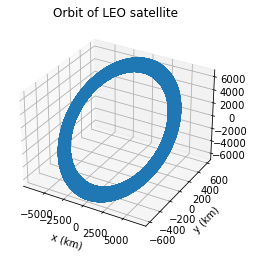

In [20]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
plt.figure(1)
ax.plot(sol.y[0],sol.y[1],sol.y[2])
plt.title('Orbit of LEO satellite')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.grid()
plt.show()

### TASK 2

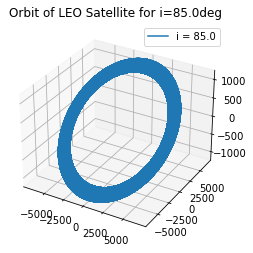

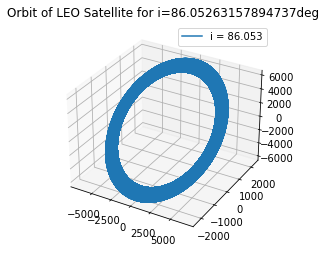

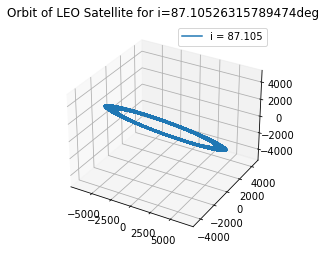

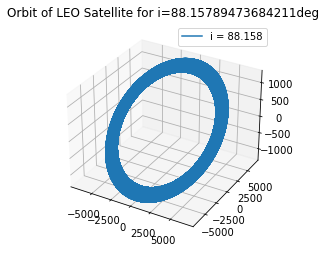

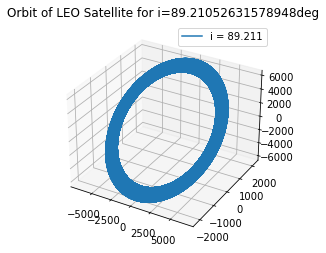

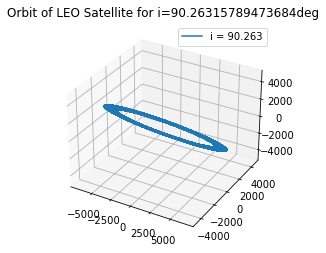

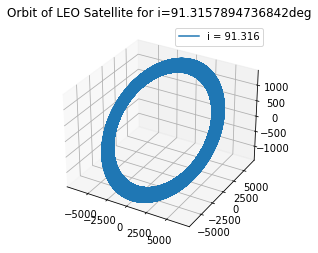

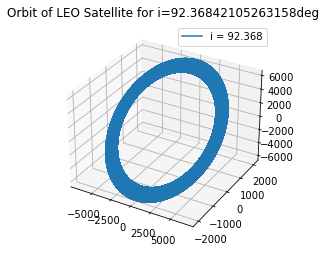

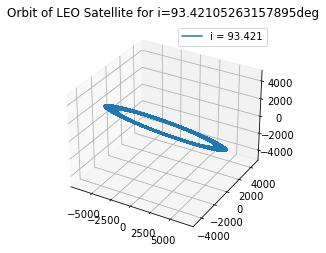

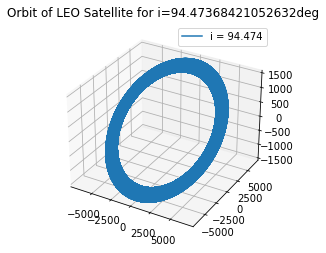

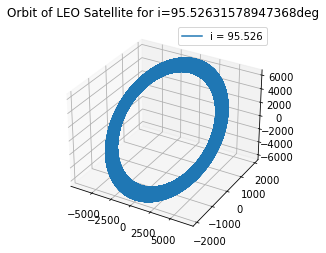

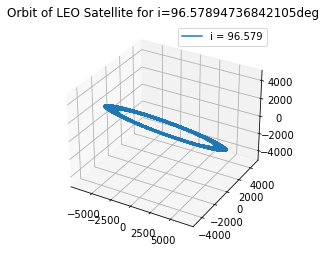

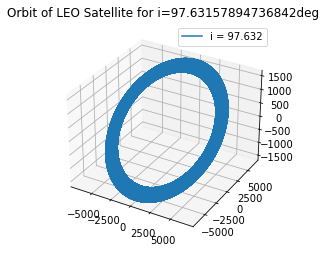

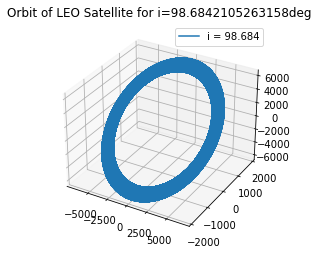

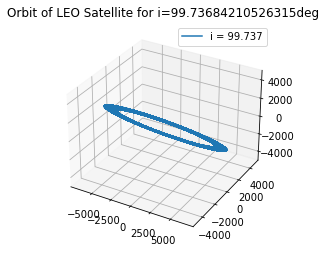

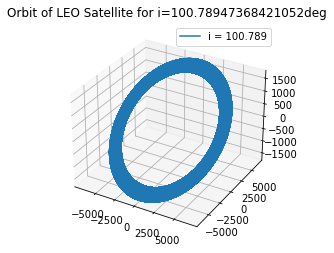

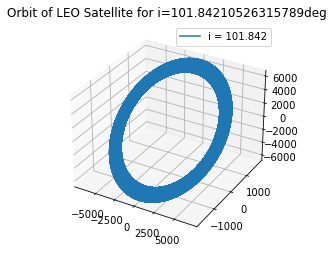

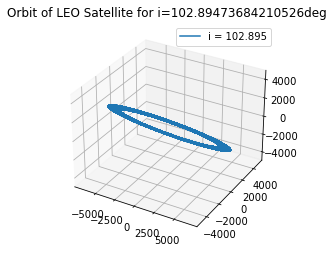

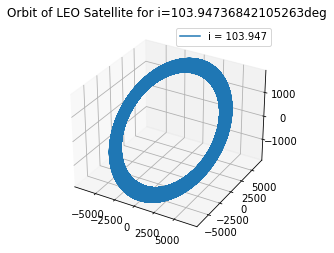

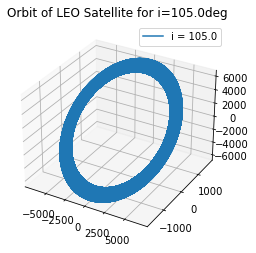

In [23]:
i1=np.linspace(85,105,20)
for j in i1:
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, projection='3d')
    IC[2]=j
    ICCAR=kep2cart(IC,mu)
    sol=solve_ivp(rhs_2bp_pert,[t0,tmax],ICCAR,t_eval=np.linspace(0,tmax,5000),method='DOP853',atol=1e-13,rtol=1e-13)
    ax.plot(sol.y[0],sol.y[1],sol.y[2],label='i = '+str(np.round(j,3)))
    plt.legend()
    plt.title("Orbit of LEO Satellite for i="+str(j)+"deg")

### TASK 3

In [48]:
%reset -f


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from numpy import diff

# Initial conditions
mu = 398600.433 #km^3/s^2
R_earth = 6378 #km
H = 400 #km 
J2=10**(-3)
a0=R_earth + H
e0=0
#Ω0=0
#w0=0
i0=85
M=0
E=0
f0=2*np.arctan(np.sqrt((1+e0)/(1-e0))*np.tan(E/2))
T = 2*(np.pi)*np.sqrt(a0**3/mu)


In [49]:
#Convert Keplerian elements to Cartesian.
def kep2cart(kep, GM):
    a,e,i,Om,w,f = kep
    p = a*(1-e*e)
    sqrt_GM = np.sqrt(GM/p)
    
    sini, cosi = np.sin(i), np.cos(i)
    sinOm, cosOm = np.sin(Om), np.cos(Om)
    sinw, cosw = np.sin(w), np. cos(w)
    sinf, cosf = np.sin(f), np.cos(f)
    
    rx = p*cosf/(1+e*cosf)
    ry = p*sinf/(1+e*cosf)
    v_x = -sqrt_GM*sinf
    v_y = sqrt_GM*(e+cosf)
    
    R11 = cosOm*cosw - sinOm*cosi*sinw
    R12 = -cosOm*sinw - cosw*cosi*sinOm
    R13 = sini*sinOm
    
    R21 = sinOm*cosw + cosOm*cosi*sinw
    R22 = -sinOm*sinw + cosOm*cosi*cosw
    R23 = -sini*cosOm
    
    R31 = sini*sinw
    R32 = sini*cosw
    R33 = cosi
    
    x = R11*rx + R12*ry
    y = R21*rx + R22*ry
    z = R31*rx + R32*ry
    vx = R11*v_x + R12*v_y
    vy = R21*v_x + R22*v_y
    vz = R31*v_x + R32*v_y
    
    return [x,y,z,vx,vy,vz]

#Convert Cartesian elements to Keplerian.
def cart2kep(cart, mu):
    x,y,z,vx,vy,vz = cart
    eps = 1e-14
    r = np.sqrt(x*x+y*y+z*z)
    rx = x
    ry = y 
    rz = z
    v = np.sqrt(vx*vx+vy*vy+vz*vz)
    E = (1/2)*v*v  - (mu/r)
    a = -mu/(2*E)
    hx = y*vz - z*vy
    hy = -x*vz + z*vx
    hz = x*vy - y*vx
    h = np.sqrt(hx*hx+hy*hy+hz*hz)
    i = np.arccos(hz/h)
    ex = (1/mu)*((v*v-mu/r)*rx - (rx*vx + ry*vy + rz*vz)*vx)
    ey = (1/mu)*((v*v-mu/r)*ry - (rx*vx + ry*vy + rz*vz)*vy)
    ez = (1/mu)*((v*v-mu/r)*rz - (rx*vx + ry*vy + rz*vz)*vz)
    e = np.sqrt(ex*ex+ey*ey+ez*ez)
    nx = -hy
    ny = hx
    nz = 0
    n = np.sqrt(nx*nx+ny*ny+nz*nz)
    
    if ny>=0:
        Om = np.arccos(nx/n)
    if ny<0:
        Om = 2*np.pi - np.arccos(nx/n)
    
    if ez>0:
        w = np.arccos((nx*ex+ny*ey)/n*e)
    else:
        w = 2*np.pi - np.arccos((nx*ex+ny*ey)/n*e)
   
    v_r = (x*vx+y*vy+z*vz)/r

    if v_r>=0:
        f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))
                      
    if v_r<0:
        f = float(2*np.pi - np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))       
     
    return [a,e,i,Om,w,f]


In [50]:
# right-hard side of perturbed two body problem in cartesian coordinates
def rhs_2bp_pert(t , X):
    x, y, z, vx, vy, vz = X
    mu = 398600.433
    R_earth = 6378 #km
    J2=10**(-3)
    
    r = np.sqrt(x**2+y**2+z**2)
    v = np.sqrt(vx**2+vy**2+vz**2)
    r3 = r*r*r
    x_dot = vx
    y_dot = vy
    z_dot = vz
    
    px = (3/2)*((J2*mu*R_earth)/(r**4))*((x/r)*(5*(z**2/r**2)-1))
    py = (3/2)*((J2*mu*R_earth)/(r**4))*((y/r)*(5*(z**2/r**2)-1))
    pz = (3/2)*((J2*mu*R_earth)/(r**4))*((z/r)*(5*(z**2/r**2)-3))
    
    vx_dot = - mu*x/r3 + px
    vy_dot = - mu*y/r3 + py 
    vz_dot = - mu*z/r3 + pz 
    return [x_dot, y_dot, z_dot, vx_dot, vy_dot, vz_dot]

C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


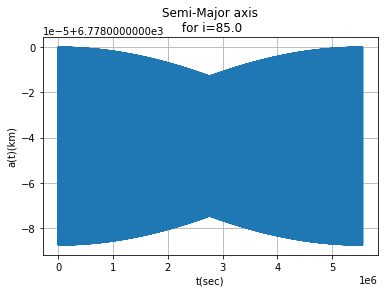

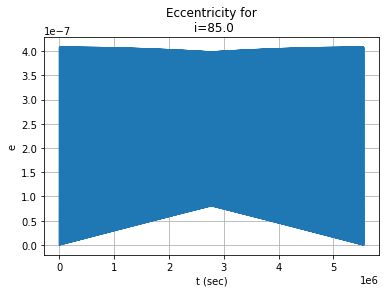

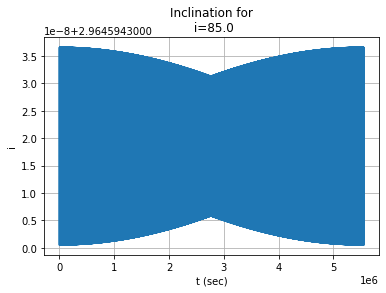

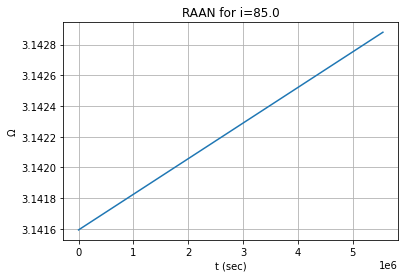

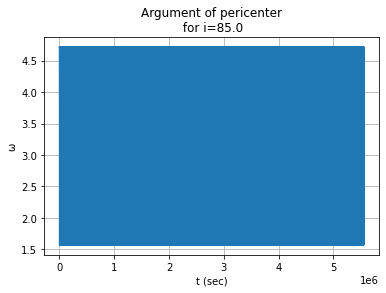

i = 85.0
da/dt = [-6.30407693e-08 -6.30178403e-08  6.30670205e-08 ... -6.25844308e-08
  6.34987597e-08  6.25566522e-08]
From the averaged theory : da/dt = 0 

de/dt = [ 2.24903781e-10  1.79746631e-10  1.29816804e-10 ... -1.29862092e-10
 -1.79828520e-10 -2.24166916e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 2.59992497e-11  2.59890256e-11 -2.60095174e-11 ...  2.58100405e-11
 -2.61871406e-11 -2.57996948e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [8.03075717e-11 3.83513972e-10 3.79271372e-10 ... 3.80624554e-10
 3.78482268e-10 8.31709751e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270491e-06 1.50270495e-06 ... 1.50270370e-06
 1.50270367e-06 1.50270363e-06] 

dw/dt = [1.40723059e-17 6.78029284e-17 1.01064742e-16 ... 1.00744917e-16
 6.78029284e-17 4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00540982e-06 3.00540989e-06 ... 3.00540366e-06
 3.00540359e-06 3.00540352e-06] 



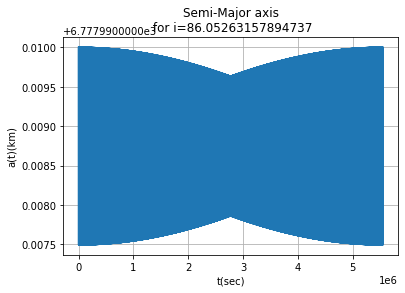

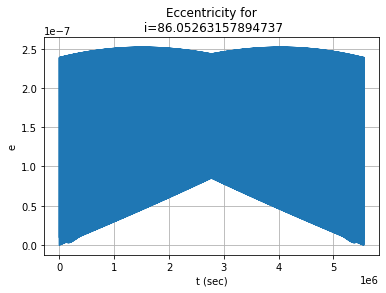

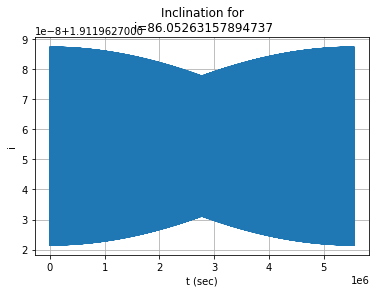

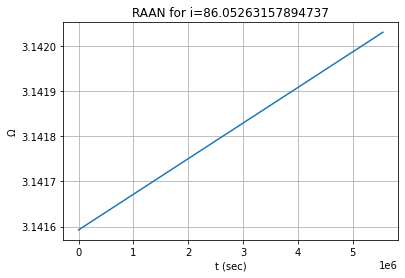

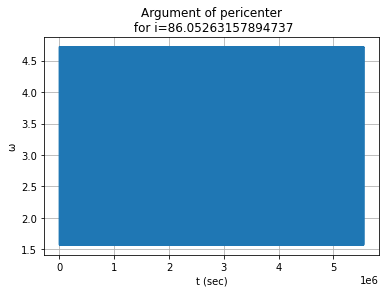

i = 86.05263157894737
da/dt = [-1.80580257e-06 -1.80509073e-06  1.80651023e-06 ... -1.80282548e-06
  1.80877447e-06  1.80211427e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.55729650e-10  8.83103650e-11 -3.30916856e-10 ...  3.30591251e-10
 -8.88494100e-11 -2.55063168e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 4.72963833e-11  4.72778207e-11 -4.73149933e-11 ...  4.72184269e-11
 -4.73742649e-11 -4.71997795e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [2.14631014e-11 1.36257839e-10 1.28632548e-10 ... 1.29093181e-10
 1.28927939e-10 2.85491791e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270585e-06 1.50270682e-06 ... 1.50270668e-06
 1.50270570e-06 1.50270473e-06] 

dw/dt = [-4.52503807e-03  1.63110818e-17  2.94239123e-17 ...  2.94239123e-17
  1.53516064e-17 -4.47755187e-17]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541170e-06 3.00541365e-06 ... 3.00541293e-06
 3.00541098e-06 3.00540904e-06] 



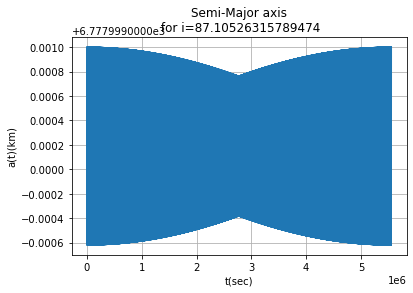

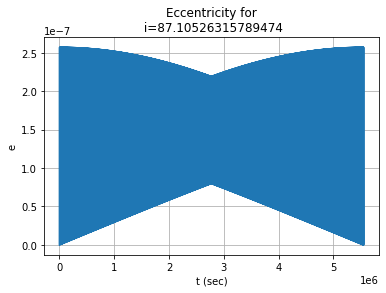

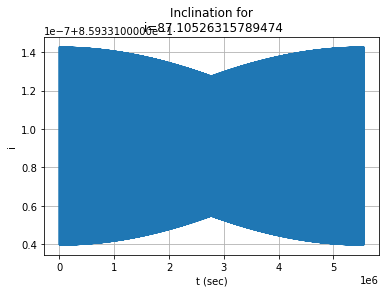

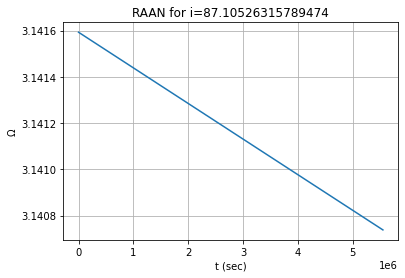

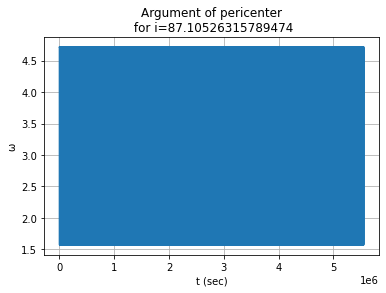

i = 87.10526315789474
da/dt = [-1.16651256e-06 -1.16605239e-06  1.16697046e-06 ... -1.16218517e-06
  1.17082577e-06  1.16172308e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.08383729e-10  2.82208443e-12 -2.32540827e-11 ...  2.42068263e-11
 -3.47745511e-12 -2.07573093e-10]
From the averaged theory : de/dt = 0 

di/dt = [-7.41831323e-11 -7.41539936e-11  7.42123596e-11 ... -7.39079419e-11
  7.44574052e-11  7.38785949e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [-5.67860284e-11 -2.51267429e-10 -2.51224064e-10 ... -2.52125254e-10
 -2.51399538e-10 -5.55138305e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270551e-06 1.50270613e-06 ... 1.50270559e-06
 1.50270496e-06 1.50270433e-06] 

dw/dt = [ 2.81446118e-17 -4.52503807e-03  4.52503807e-03 ...  4.52503807e-03
 -4.52503807e-03  4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541101e-06 3.00541227e-06 ... 3.00540953e-06
 3.00540827e-06 3.00540701e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


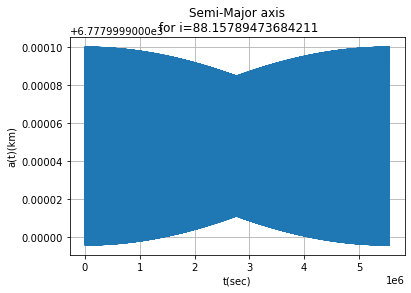

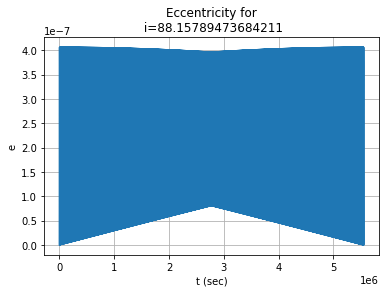

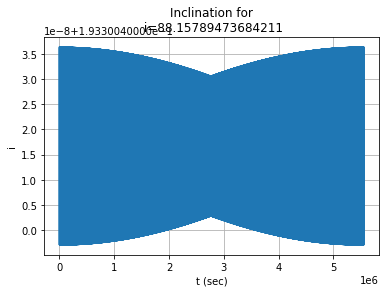

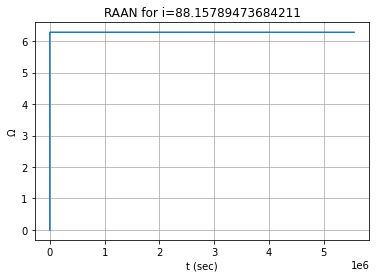

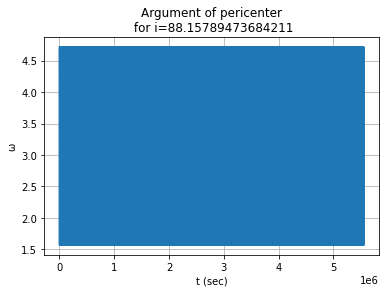

i = 88.15789473684211
da/dt = [-7.50382225e-08 -7.50063593e-08  7.50669050e-08 ... -7.44969355e-08
  7.55767244e-08  7.44650684e-08]
From the averaged theory : da/dt = 0 

de/dt = [ 2.24046659e-10  1.76913407e-10  1.29740059e-10 ... -1.29770093e-10
 -1.76995236e-10 -2.23312641e-10]
From the averaged theory : de/dt = 0 

di/dt = [-2.82787658e-11 -2.82676429e-11  2.82899318e-11 ... -2.80740635e-11
  2.84820452e-11  2.80628118e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 9.05007606e-03 -3.79203120e-10 -3.78301173e-10 ... -3.79458623e-10
 -3.77334051e-10 -8.29231733e-11]
From the averaged theory : dΩ/dt =  [-1.50270488e-06 -1.50270492e-06 -1.50270496e-06 ... -1.50270372e-06
 -1.50270368e-06 -1.50270364e-06] 

dw/dt = [-4.52503807e-03  6.68434530e-17  9.91457915e-17 ...  9.85061412e-17
  6.65236278e-17 -4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00540984e-06 3.00540992e-06 ... 3.00540373e-06
 3.00540364e-06 3.00540356e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


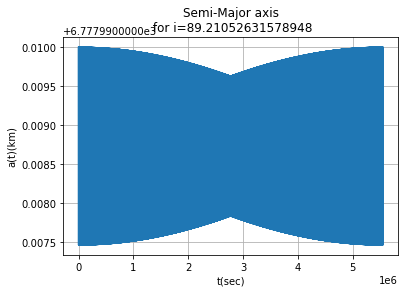

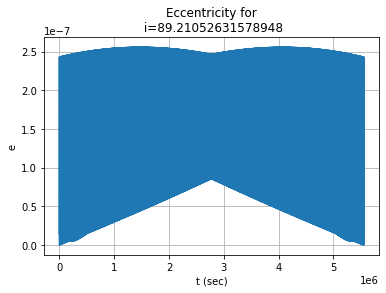

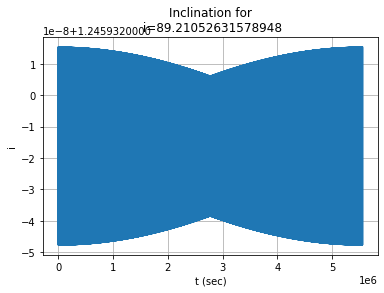

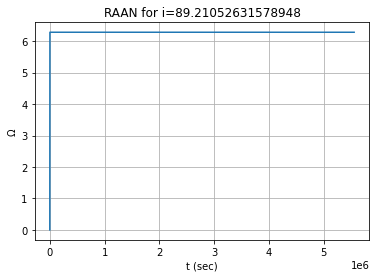

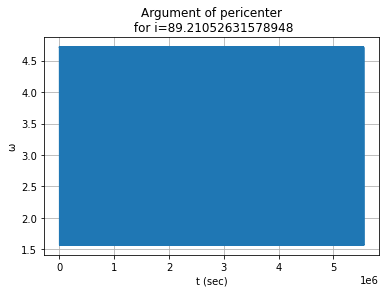

i = 89.21052631578948
da/dt = [-1.82628323e-06 -1.82556514e-06  1.82700025e-06 ... -1.82339119e-06
  1.82916876e-06  1.82267363e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.57717744e-10  9.22224845e-11 -3.30482457e-10 ...  3.30178375e-10
 -9.27506017e-11 -2.57063394e-10]
From the averaged theory : de/dt = 0 

di/dt = [-4.53737277e-11 -4.53559188e-11  4.53915800e-11 ... -4.53019336e-11
  4.54454587e-11  4.52840461e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 9.05007610e-03 -1.13066527e-10 -1.22094516e-10 ... -1.23145074e-10
 -1.22994264e-10 -2.72383629e-11]
From the averaged theory : dΩ/dt =  [-1.50270488e-06 -1.50270586e-06 -1.50270685e-06 ... -1.50270671e-06
 -1.50270573e-06 -1.50270475e-06] 

dw/dt = [-4.60548193e-17  1.66309070e-17  2.94239123e-17 ...  2.94239123e-17
  1.66309070e-17 -4.60548193e-17]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541172e-06 3.00541369e-06 ... 3.00541304e-06
 3.00541106e-06 3.00540910e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


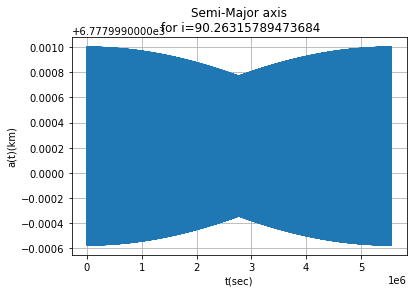

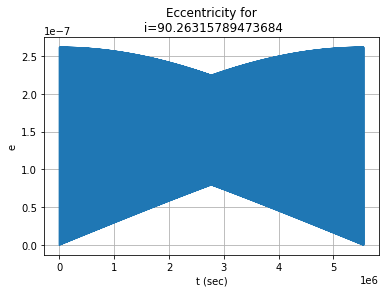

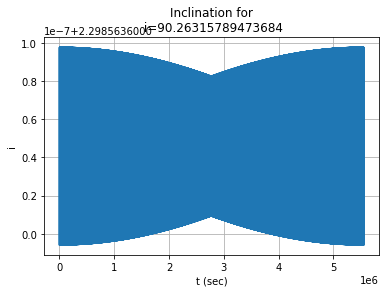

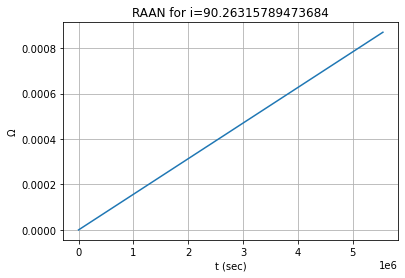

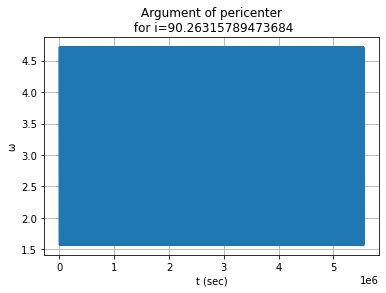

i = 90.26315789473684
da/dt = [-1.13365143e-06 -1.13320368e-06  1.13409616e-06 ... -1.12932298e-06
  1.13795992e-06  1.12887662e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.06910868e-10  2.00823249e-12 -1.06487820e-11 ...  1.15970515e-11
 -2.65249584e-12 -2.06102986e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 7.45039122e-11  7.44746463e-11 -7.45332683e-11 ...  7.42196293e-11
 -7.47872153e-11 -7.41901504e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [5.67860287e-11 2.56457624e-10 2.56236781e-10 ... 2.56869729e-10
 2.56109712e-10 5.65453633e-11]
From the averaged theory : dΩ/dt =  [-1.50270488e-06 -1.50270549e-06 -1.50270610e-06 ... -1.50270553e-06
 -1.50270492e-06 -1.50270431e-06] 

dw/dt = [-0.00452504  0.00452504 -0.00452504 ... -0.00452504  0.00452504
 -0.00452504]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541098e-06 3.00541220e-06 ... 3.00540935e-06
 3.00540813e-06 3.00540691e-06] 



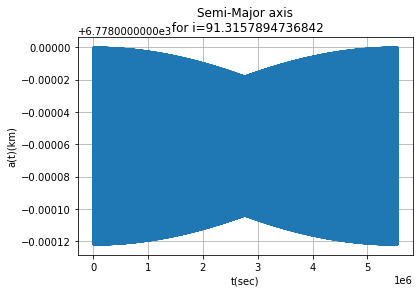

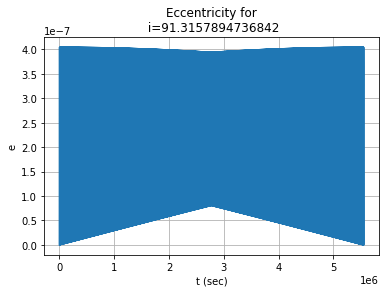

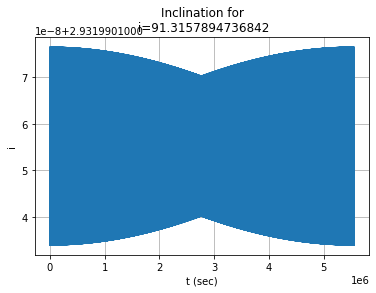

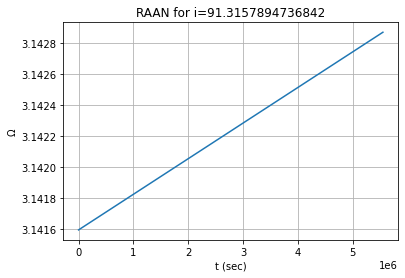

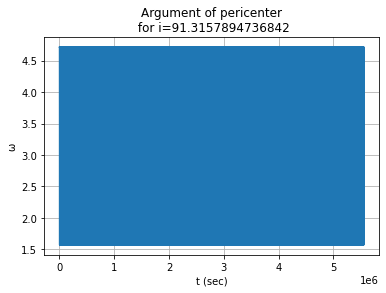

i = 91.3157894736842
da/dt = [-8.80349596e-08 -8.79991664e-08  8.80697049e-08 ... -8.74034841e-08
  8.86640470e-08  8.73659525e-08]
From the averaged theory : da/dt = 0 

de/dt = [ 2.23131415e-10  1.73843984e-10  1.29643278e-10 ... -1.29656744e-10
 -1.73926106e-10 -2.22400552e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 3.05282205e-11  3.05162136e-11 -3.05402747e-11 ...  3.03085205e-11
 -3.07464027e-11 -3.02963754e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [8.31262341e-11 3.77706096e-10 3.77053721e-10 ... 3.78191286e-10
 3.76085892e-10 8.26536605e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270493e-06 1.50270497e-06 ... 1.50270374e-06
 1.50270369e-06 1.50270365e-06] 

dw/dt = [1.53516064e-17 6.52443273e-17 9.72268407e-17 ... 9.75466658e-17
 6.52443273e-17 4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00540985e-06 3.00540995e-06 ... 3.00540380e-06
 3.00540370e-06 3.00540360e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


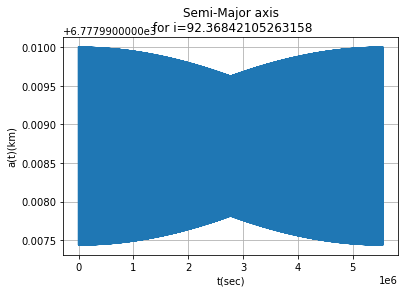

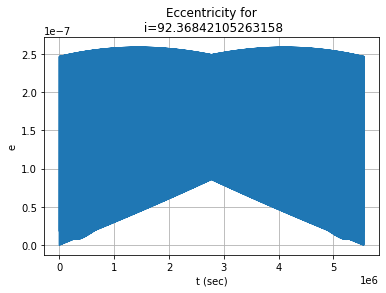

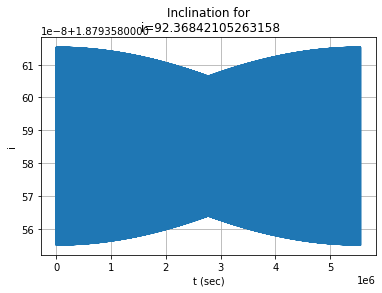

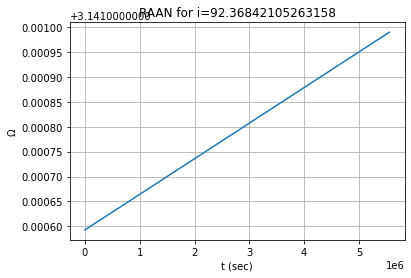

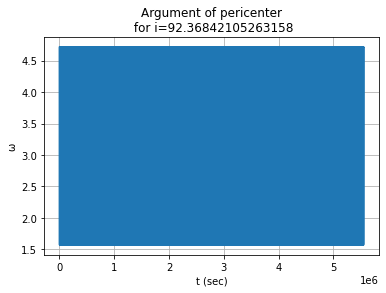

i = 92.36842105263158
da/dt = [-1.84590361e-06 -1.84517917e-06  1.84663099e-06 ... -1.84310023e-06
  1.84870469e-06  1.84237227e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.59643562e-10  9.59989535e-11 -3.30070838e-10 ...  3.29780979e-10
 -9.65164499e-11 -2.59001187e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 4.34028414e-11  4.33858072e-11 -4.34199178e-11 ...  4.33369088e-11
 -4.34687225e-11 -4.33198001e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [2.14631014e-11 1.22515759e-10 1.16247414e-10 ... 1.17166063e-10
 1.17026974e-10 2.59193056e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270587e-06 1.50270687e-06 ... 1.50270675e-06
 1.50270575e-06 1.50270476e-06] 

dw/dt = [-4.52503807e-03  1.75903824e-17  2.97437374e-17 ...  2.94239123e-17
  1.66309070e-17 -4.60548193e-17]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541174e-06 3.00541373e-06 ... 3.00541314e-06
 3.00541115e-06 3.00540916e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


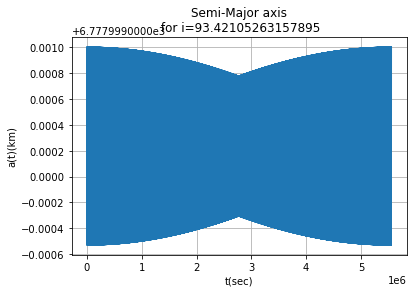

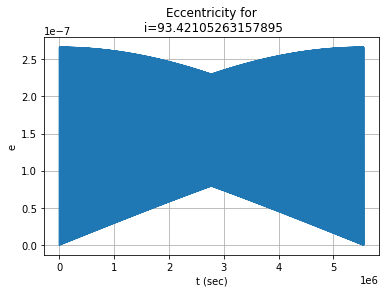

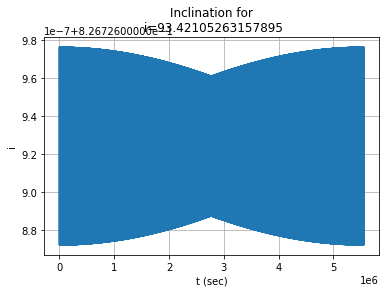

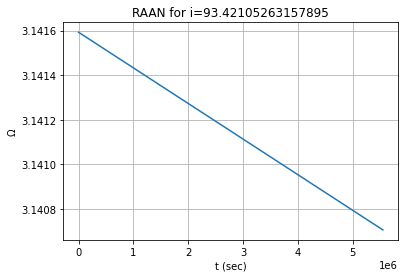

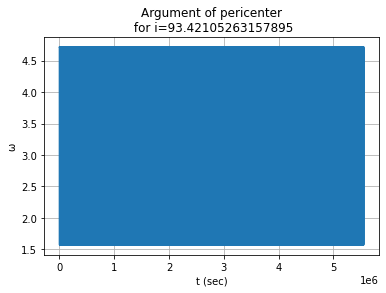

i = 93.42105263157895
da/dt = [-1.10066486e-06 -1.10023286e-06  1.10109817e-06 ... -1.09634947e-06
  1.10496670e-06  1.09591249e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.05545701e-10  1.72513953e-12  1.35717991e-12 ... -4.16240101e-13
 -2.35605204e-12 -2.04741400e-10]
From the averaged theory : de/dt = 0 

di/dt = [-7.47454987e-11 -7.47161373e-11  7.47749522e-11 ... -7.44523347e-11
  7.50376196e-11  7.44227552e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [-5.67860284e-11 -2.62285913e-10 -2.61622967e-10 ... -2.61546826e-10
 -2.60750466e-10 -5.75621589e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270547e-06 1.50270606e-06 ... 1.50270547e-06
 1.50270488e-06 1.50270429e-06] 

dw/dt = [ 2.68653112e-17 -4.52503807e-03  4.52503807e-03 ...  4.52503807e-03
 -4.52503807e-03  4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541094e-06 3.00541213e-06 ... 3.00540918e-06
 3.00540799e-06 3.00540681e-06] 



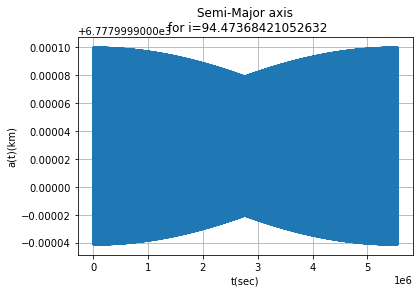

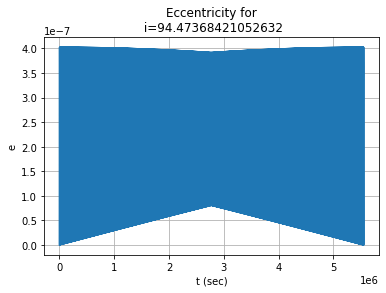

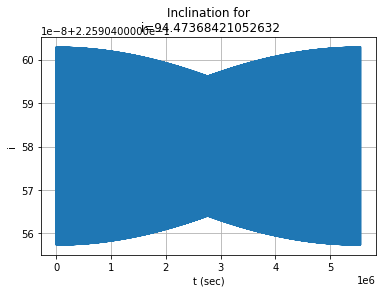

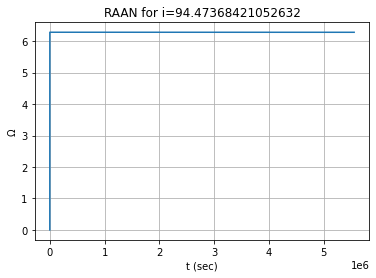

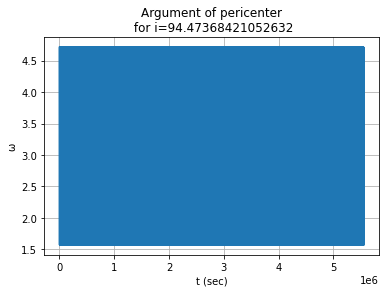

i = 94.47368421052632
da/dt = [-1.02018610e-07 -1.01979154e-07  1.02061496e-07 ... -1.01289437e-07
  1.02742593e-07  1.01249139e-07]
From the averaged theory : da/dt = 0 

de/dt = [ 2.22162359e-10  1.70542135e-10  1.29522823e-10 ... -1.29518318e-10
 -1.70624835e-10 -2.21434882e-10]
From the averaged theory : de/dt = 0 

di/dt = [-3.27452268e-11 -3.27323479e-11  3.27581566e-11 ... -3.25110535e-11
  3.29777911e-11  3.24980288e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 9.05007606e-03 -3.78521131e-10 -3.76303855e-10 ... -3.76822932e-10
 -3.74738585e-10 -8.23624315e-11]
From the averaged theory : dΩ/dt =  [-1.50270488e-06 -1.50270493e-06 -1.50270499e-06 ... -1.50270377e-06
 -1.50270371e-06 -1.50270366e-06] 

dw/dt = [-4.52503807e-03  6.39650268e-17  9.59475401e-17 ...  9.46682396e-17
  6.39650268e-17 -4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00540987e-06 3.00540998e-06 ... 3.00540387e-06
 3.00540376e-06 3.00540365e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


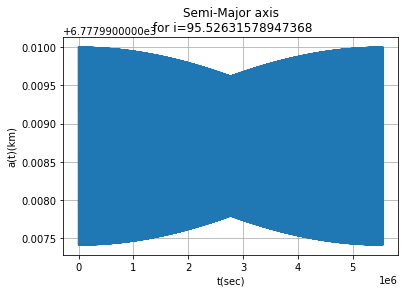

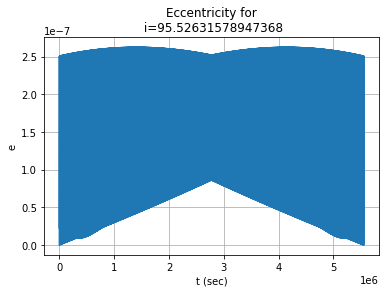

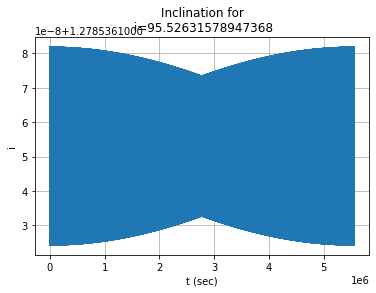

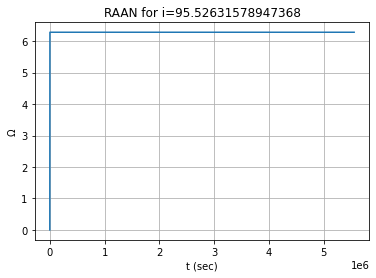

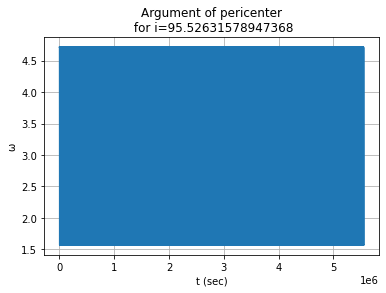

i = 95.52631578947368
da/dt = [-1.86464330e-06 -1.86390859e-06  1.86537410e-06 ... -1.86192052e-06
  1.86735923e-06  1.86118792e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.61501885e-10  9.96300648e-11 -3.29703468e-10 ...  3.29424573e-10
 -1.00137090e-10 -2.60871531e-10]
From the averaged theory : de/dt = 0 

di/dt = [-4.13858213e-11 -4.13695790e-11  4.14021036e-11 ... -4.13254508e-11
  4.14461506e-11  4.13091382e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 9.05007612e-03 -1.14281471e-10 -1.11779988e-10 ... -1.11156174e-10
 -1.11029487e-10 -2.45925571e-11]
From the averaged theory : dΩ/dt =  [-1.50270488e-06 -1.50270588e-06 -1.50270689e-06 ... -1.50270678e-06
 -1.50270577e-06 -1.50270477e-06] 

dw/dt = [-4.73341198e-17  1.79102075e-17  2.94239123e-17 ...  3.00635626e-17
  1.79102075e-17 -4.73341198e-17]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541176e-06 3.00541377e-06 ... 3.00541324e-06
 3.00541123e-06 3.00540922e-06] 



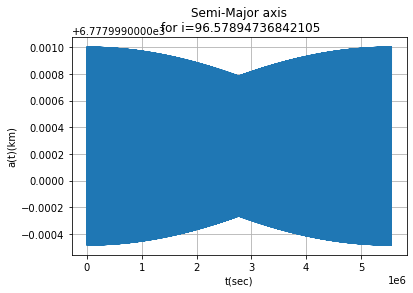

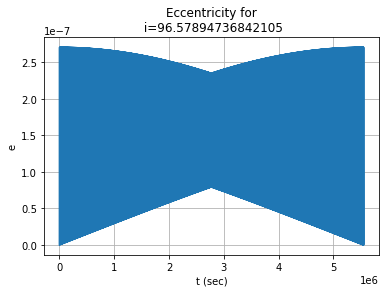

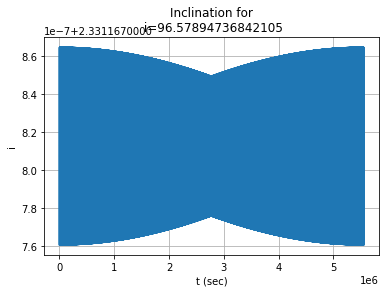

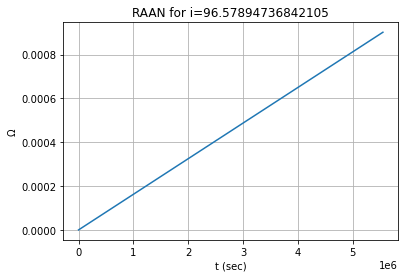

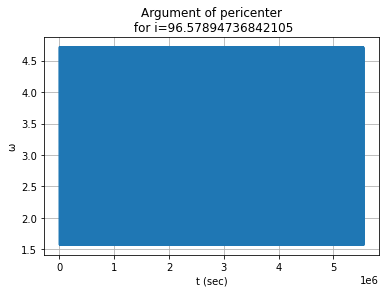

i = 96.57894736842105
da/dt = [-1.06759020e-06 -1.06717128e-06  1.06801292e-06 ... -1.06329043e-06
  1.07187529e-06  1.06286664e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.04293120e-10  1.99151547e-12  1.27293435e-11 ... -1.17982580e-11
 -2.60683739e-12 -2.03493027e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 7.49076365e-11  7.48782087e-11 -7.49371550e-11 ...  7.46058360e-11
 -7.52083277e-11 -7.45761876e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [5.67860287e-11 2.68718021e-10 2.65023846e-10 ... 2.66153929e-10
 2.65322456e-10 5.85625003e-11]
From the averaged theory : dΩ/dt =  [-1.50270488e-06 -1.50270545e-06 -1.50270603e-06 ... -1.50270542e-06
 -1.50270484e-06 -1.50270427e-06] 

dw/dt = [-0.00452504  0.00452504 -0.00452504 ... -0.00452504  0.00452504
 -0.00452504]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541091e-06 3.00541206e-06 ... 3.00540900e-06
 3.00540785e-06 3.00540670e-06] 



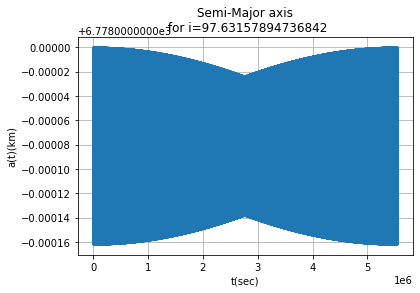

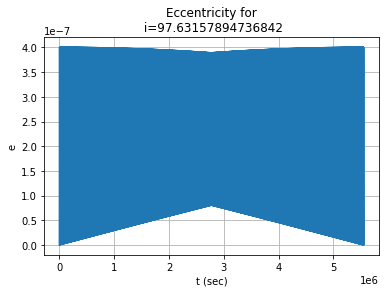

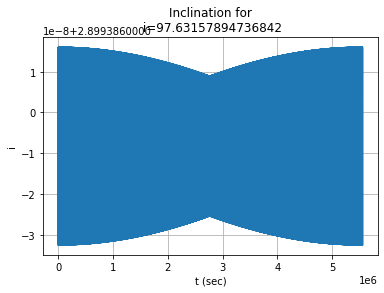

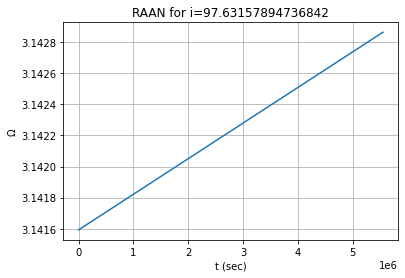

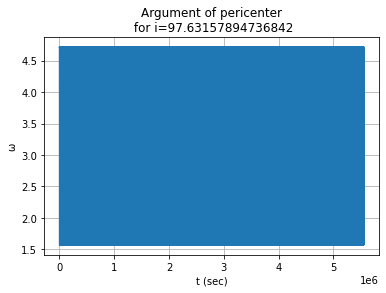

i = 97.63157894736842
da/dt = [-1.16975361e-07 -1.16929613e-07  1.17023974e-07 ... -1.16144711e-07
  1.17799684e-07  1.16098322e-07]
From the averaged theory : da/dt = 0 

de/dt = [ 2.21144151e-10  1.67011971e-10  1.29374423e-10 ... -1.29351095e-10
 -1.67095491e-10 -2.20419846e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 3.49274261e-11  3.49136896e-11 -3.49412176e-11 ...  3.46793410e-11
 -3.51738220e-11 -3.46654471e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [8.03075717e-11 3.76508714e-10 3.75000048e-10 ... 3.75354152e-10
 3.73291876e-10 8.20500692e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270494e-06 1.50270500e-06 ... 1.50270379e-06
 1.50270373e-06 1.50270367e-06] 

dw/dt = [1.53516064e-17 6.26857262e-17 9.33889391e-17 ... 9.40285893e-17
 6.23659011e-17 4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00540988e-06 3.00541001e-06 ... 3.00540395e-06
 3.00540382e-06 3.00540369e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


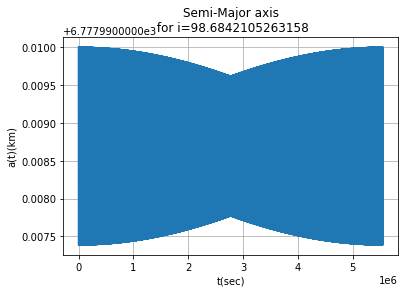

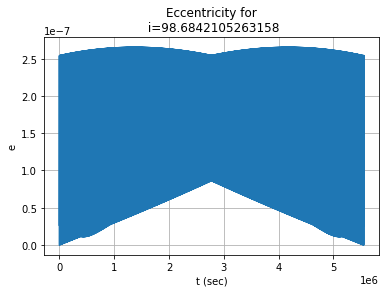

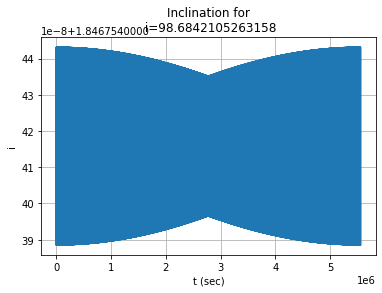

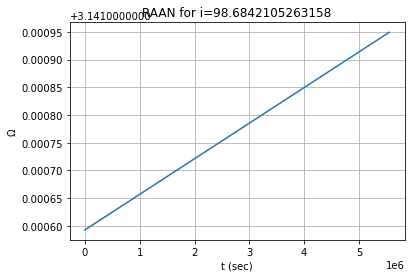

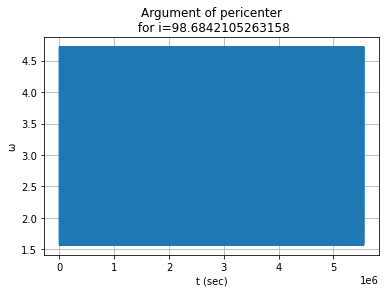

i = 98.6842105263158
da/dt = [-1.88248052e-06 -1.88174161e-06  1.88321985e-06 ... -1.87983989e-06
  1.88511492e-06  1.87910097e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.63287638e-10  1.03107624e-10 -3.29383454e-10 ...  3.29113598e-10
 -1.03604310e-10 -2.62669073e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 3.93248100e-11  3.93093778e-11 -3.93402815e-11 ...  3.92697051e-11
 -3.93798823e-11 -3.92542070e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [2.14631014e-11 1.09091847e-10 1.02594010e-10 ... 1.05116639e-10
 1.05001369e-10 2.32593020e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270589e-06 1.50270691e-06 ... 1.50270681e-06
 1.50270579e-06 1.50270478e-06] 

dw/dt = [-4.52503807e-03  1.88696829e-17  3.00635626e-17 ...  3.07032128e-17
  1.91895080e-17 -4.86134203e-17]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541178e-06 3.00541381e-06 ... 3.00541333e-06
 3.00541130e-06 3.00540928e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


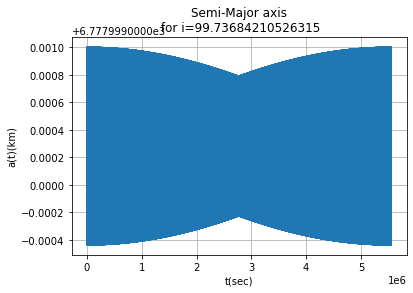

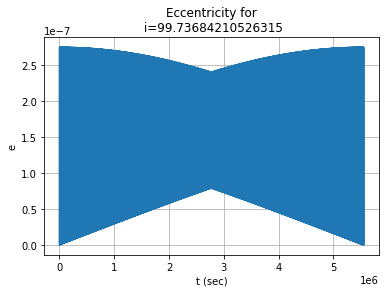

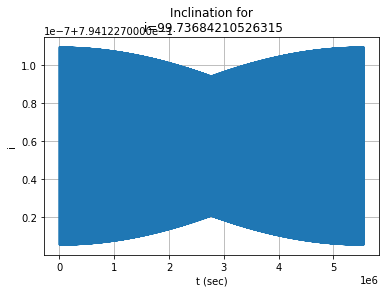

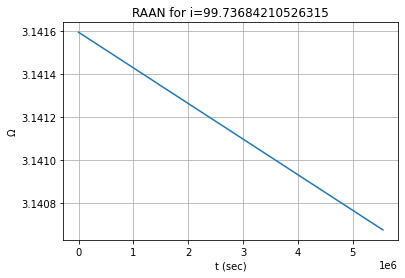

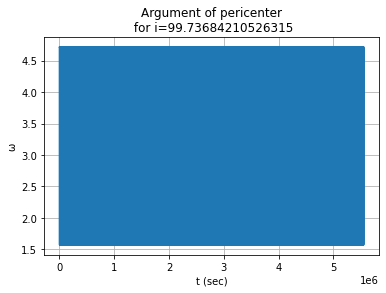

i = 99.73684210526315
da/dt = [-1.03446025e-06 -1.03405574e-06  1.03486946e-06 ... -1.03018059e-06
  1.03872183e-06  1.02977322e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.03157312e-10  2.81815158e-12  2.34413433e-11 ... -2.25228843e-11
 -3.41575201e-12 -2.02361782e-10]
From the averaged theory : de/dt = 0 

di/dt = [-7.49901509e-11 -7.49606910e-11  7.50197046e-11 ... -7.46799972e-11
  7.52991304e-11  7.46503108e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [-5.67860284e-11 -2.73634217e-10 -2.70163201e-10 ... -2.70691352e-10
 -2.69823461e-10 -5.95470455e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270544e-06 1.50270599e-06 ... 1.50270536e-06
 1.50270480e-06 1.50270425e-06] 

dw/dt = [ 2.55860107e-17 -4.52503807e-03  4.52503807e-03 ...  4.52503807e-03
 -4.52503807e-03  4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541087e-06 3.00541198e-06 ... 3.00540883e-06
 3.00540771e-06 3.00540660e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


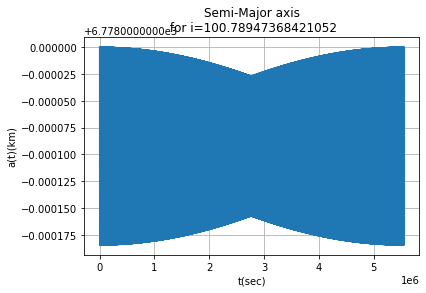

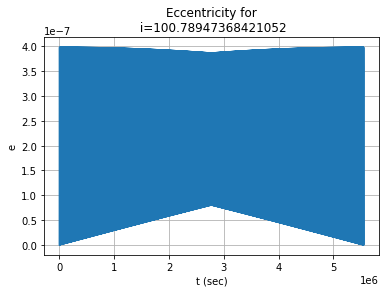

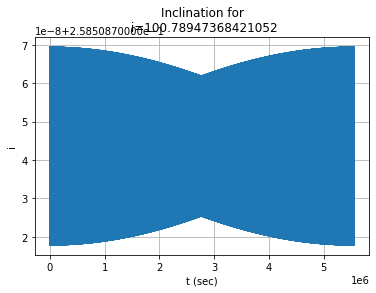

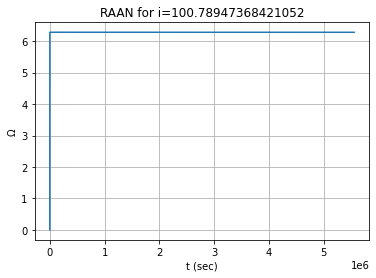

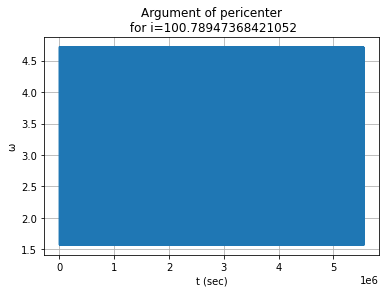

i = 100.78947368421052
da/dt = [-1.32888101e-07 -1.32836133e-07  1.32943140e-07 ... -1.31951588e-07
  1.33818393e-07  1.31898157e-07]
From the averaged theory : da/dt = 0 

de/dt = [ 2.20081839e-10  1.63257941e-10  1.29193682e-10 ... -1.29150486e-10
 -1.63342716e-10 -2.19360855e-10]
From the averaged theory : de/dt = 0 

di/dt = [-3.70725006e-11 -3.70579209e-11  3.70871386e-11 ... -3.68110884e-11
  3.73321446e-11  3.67963433e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 9.05007606e-03 -3.72680511e-10 -3.72402027e-10 ... -3.73785231e-10
 -3.71746337e-10 -8.17159895e-11]
From the averaged theory : dΩ/dt =  [-1.50270488e-06 -1.50270495e-06 -1.50270502e-06 ... -1.50270382e-06
 -1.50270375e-06 -1.50270368e-06] 

dw/dt = [-4.52503807e-03  6.10866006e-17  9.21096385e-17 ...  9.21096385e-17
  6.14064257e-17 -4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00540990e-06 3.00541004e-06 ... 3.00540403e-06
 3.00540389e-06 3.00540374e-06] 



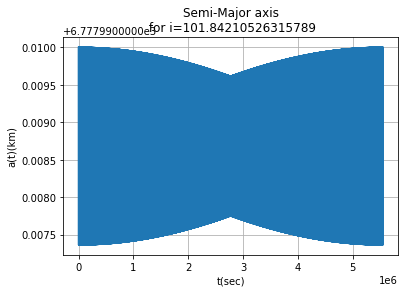

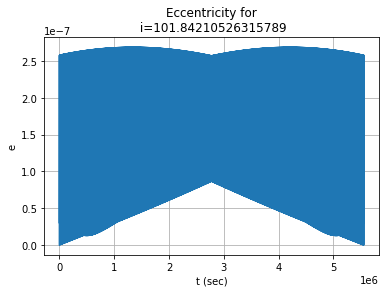

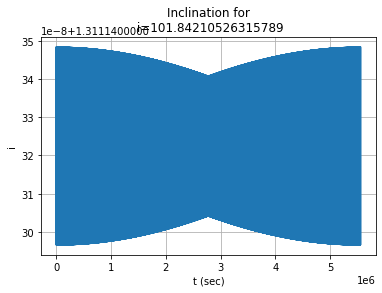

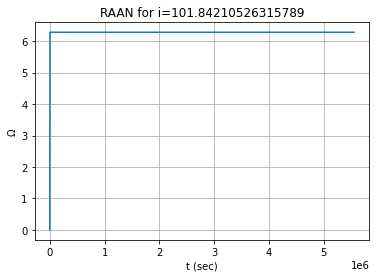

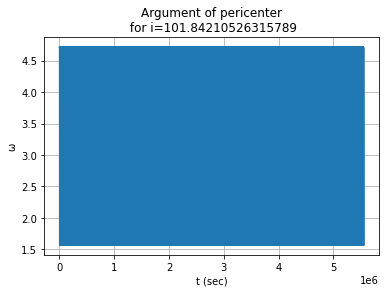

i = 101.84210526315789
da/dt = [-1.89939834e-06 -1.89865287e-06  1.90014654e-06 ... -1.89683853e-06
  1.90195385e-06  1.89609179e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.64996201e-10  1.06423309e-10 -3.29108072e-10 ...  3.28845932e-10
 -1.06910110e-10 -2.64389122e-10]
From the averaged theory : de/dt = 0 

di/dt = [-3.72220000e-11 -3.72073920e-11  3.72366429e-11 ... -3.71718690e-11
  3.72721041e-11  3.71572006e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 9.05007614e-03 -1.19501491e-10 -9.93800557e-11 ... -9.90488384e-11
 -9.89457306e-11 -2.19187089e-11]
From the averaged theory : dΩ/dt =  [-1.50270488e-06 -1.50270590e-06 -1.50270692e-06 ... -1.50270684e-06
 -1.50270581e-06 -1.50270479e-06] 

dw/dt = [-4.86134203e-17  1.91895080e-17  3.07032128e-17 ...  3.03833877e-17
  1.91895080e-17 -4.86134203e-17]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541180e-06 3.00541385e-06 ... 3.00541342e-06
 3.00541137e-06 3.00540933e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


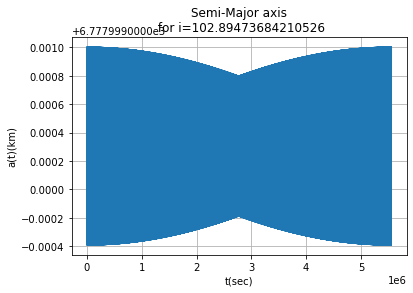

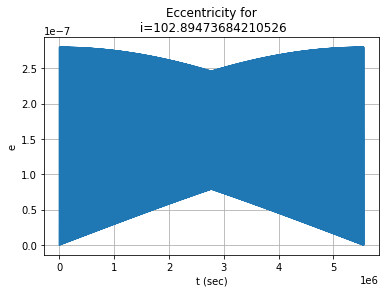

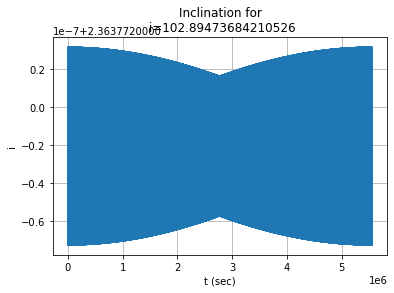

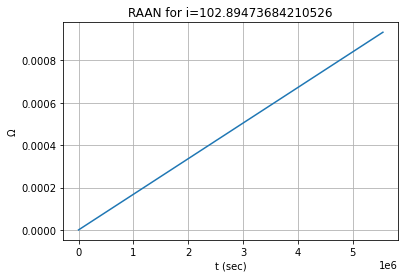

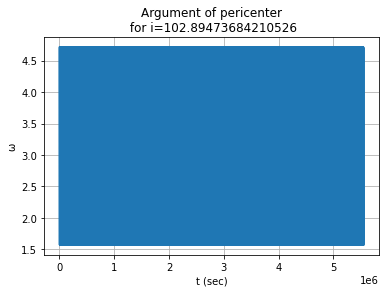

i = 102.89473684210526
da/dt = [-1.00131395e-06 -1.00091775e-06  1.00170645e-06 ... -9.97065356e-07
  1.00554647e-06  9.96667310e-07]
From the averaged theory : da/dt = 0 

de/dt = [ 2.02141956e-10  4.20700688e-12  3.34766895e-11 ... -3.25735969e-11
 -4.78503994e-12 -2.01351703e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 7.49929562e-11  7.49634933e-11 -7.50225125e-11 ...  7.46747635e-11
 -7.53099080e-11 -7.46450703e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [5.67860287e-11 2.78478333e-10 2.75209029e-10 ... 2.75156939e-10
 2.74251532e-10 6.05160529e-11]
From the averaged theory : dΩ/dt =  [-1.50270488e-06 -1.50270542e-06 -1.50270596e-06 ... -1.50270530e-06
 -1.50270476e-06 -1.50270423e-06] 

dw/dt = [-0.00452504  0.00452504 -0.00452504 ... -0.00452504  0.00452504
 -0.00452504]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541083e-06 3.00541191e-06 ... 3.00540865e-06
 3.00540757e-06 3.00540649e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


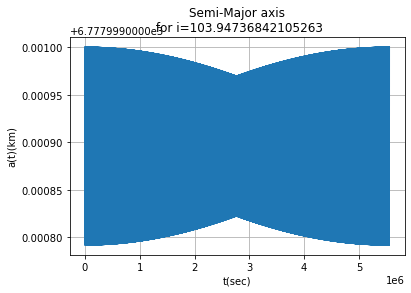

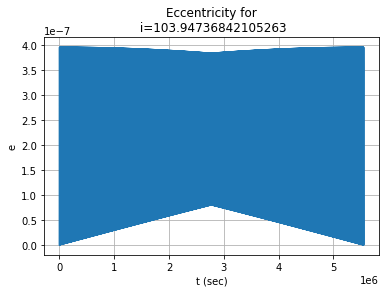

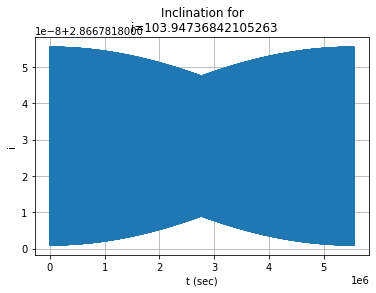

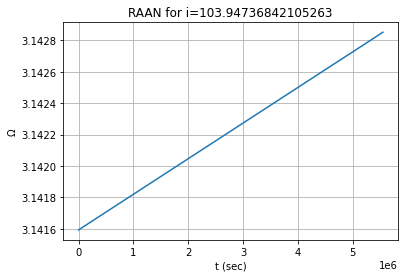

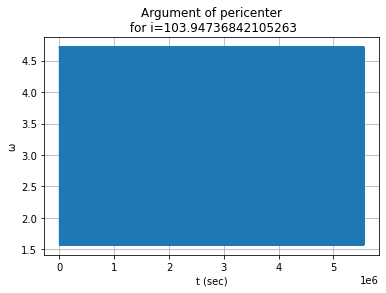

i = 103.94736842105263
da/dt = [-1.49740307e-07 -1.49681208e-07  1.49800270e-07 ... -1.48694766e-07
  1.50780370e-07  1.48633357e-07]
From the averaged theory : da/dt = 0 

de/dt = [ 2.18980755e-10  1.59285032e-10  1.28975494e-10 ... -1.28911587e-10
 -1.59371456e-10 -2.18262932e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 3.91781682e-11  3.91627610e-11 -3.91936363e-11 ...  3.89040480e-11
 -3.94504507e-11 -3.88884655e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [8.31262341e-11 3.70146825e-10 3.71312370e-10 ... 3.72116662e-10
 3.70102245e-10 8.13607041e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270496e-06 1.50270504e-06 ... 1.50270385e-06
 1.50270377e-06 1.50270369e-06] 

dw/dt = [1.53516064e-17 5.88478246e-17 9.08303380e-17 ... 9.01906877e-17
 5.91676497e-17 4.52503807e-03]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00540992e-06 3.00541008e-06 ... 3.00540412e-06
 3.00540396e-06 3.00540380e-06] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_11684/2537125485.py:76: RuntimeWarning: invalid value encountered in double_scalars
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


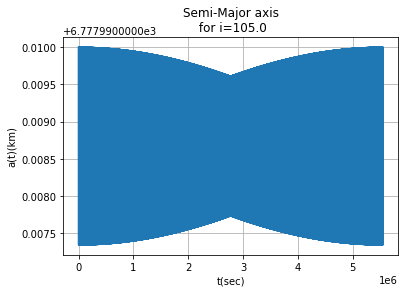

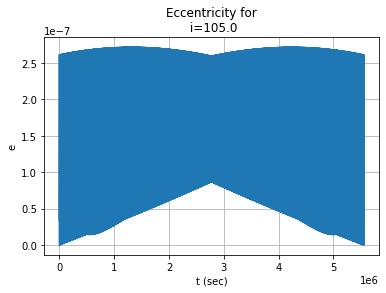

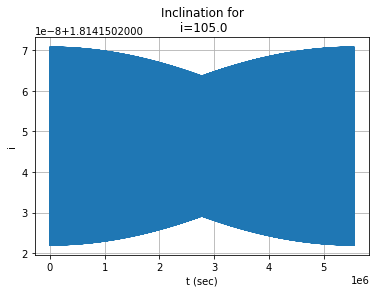

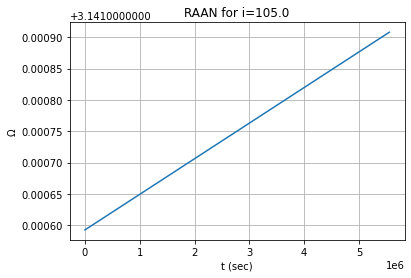

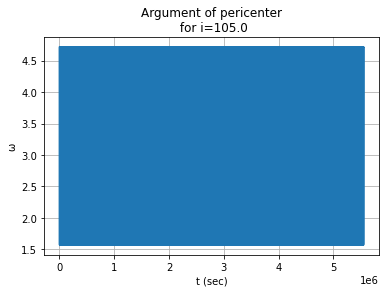

i = 105.0
da/dt = [-1.91537844e-06 -1.91462400e-06  1.91612927e-06 ... -1.91289641e-06
  1.91785905e-06  1.91214076e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.66623087e-10  1.09569837e-10 -3.28872863e-10 ...  3.28618069e-10
 -1.10047477e-10 -2.66026930e-10]
From the averaged theory : de/dt = 0 

di/dt = [ 3.50796242e-11  3.50658583e-11 -3.50934243e-11 ...  3.50341844e-11
 -3.51250448e-11 -3.50203615e-11]
From the averaged theory : di/dt = 0 

dΩ/dt = [2.14631014e-11 9.00624449e-11 9.65669423e-11 ... 9.29569001e-11
 9.28622939e-11 2.05738609e-11]
From the averaged theory : dΩ/dt =  [1.50270488e-06 1.50270591e-06 1.50270694e-06 ... 1.50270687e-06
 1.50270583e-06 1.50270480e-06] 

dw/dt = [-4.52503807e-03  2.01489834e-17  3.07032128e-17 ...  3.07032128e-17
  1.91895080e-17 -4.86134203e-17]
From the averaged theory : dw/dt =  [3.00540976e-06 3.00541182e-06 3.00541388e-06 ... 3.00541351e-06
 3.00541144e-06 3.00540938e-06] 



In [57]:
t0 = 0.0;
tmax = 1000*T;
IC = [ a0 , e0, np.deg2rad(i0), np.deg2rad(0), np.deg2rad(0), 0 ];
#ICCAR = kep2cart(IC,mu);
i1=np.linspace(85,105,20)
for j in i1:
    IC[2]=j
    ICCAR=kep2cart(IC,mu)
    # solve 2-body problem in cartesian coordinates
    sol = solve_ivp(rhs_2bp_pert, [t0, tmax], ICCAR ,t_eval=np.linspace(0,tmax,8000),method='DOP853',atol=1e-13,rtol=1e-13)
    celem = [];
   # print(len(sol.t))
   # print(len(sol.y[0]))
    for i in range(0, len(sol.t)):
        car = sol.y[:,i]
        coe = cart2kep(car,mu)
        celem.append(coe)
    solcoe = np.transpose(np.array(celem))
    plt.figure(1)
    plt.plot(sol.t,solcoe[0]) 
    plt.title("Semi-Major axis\n for i="+str(j))
    plt.xlabel('t(sec)')
    plt.ylabel('a(t)(km)')
    plt.grid() 
    plt.show()
    plt.figure(2)
    plt.plot(sol.t,solcoe[1])
    plt.title("Eccentricity for\n i="+str(j))
    plt.xlabel('t (sec)')
    plt.ylabel('e')
    plt.grid()
    plt.show()
    plt.figure(3)
    plt.plot(sol.t,solcoe[2])
    plt.title("Inclination for\n i="+str(j))
    plt.xlabel('t (sec)')
    plt.ylabel('i')
    plt.grid()
    plt.show()
    plt.figure(4)
    plt.plot(sol.t,solcoe[3])
    plt.title("RAAN for i="+str(j))
    plt.xlabel('t (sec)')
    plt.ylabel('Ω')
    plt.grid()
    plt.show()
    plt.figure(5)
    plt.plot(sol.t,solcoe[4])
    plt.title("Argument of pericenter\n for i="+str(j))
    plt.xlabel('t (sec)')
    plt.ylabel('ω')
    plt.grid()
    plt.show()
    
    # Averaged theory
    w_dot=((3*J2*(R_earth**2)*np.sqrt(mu/solcoe[0]**3))/(2*(solcoe[0]**2)*(1-solcoe[1]**2)))*(2-(5/2)*(np.sin(solcoe[3]))**2)
    Om_dot=-(3*np.sqrt(mu/solcoe[0]**3)*J2*(R_earth**2)*np.cos(solcoe[3]))/(2*(solcoe[0]**2)*(1-solcoe[1]**2)**2)
    da=diff(solcoe[0])/diff(sol.t)
    de=diff(solcoe[1])/diff(sol.t)
    di=diff(solcoe[2])/diff(sol.t)
    dOm=diff(solcoe[3])/diff(sol.t)
    dw=diff(solcoe[4])/diff(sol.t)
    
    print("i = "+str(j))
    print("da/dt = "+str(da))
    print("From the averaged theory : da/dt = 0 \n")
    print("de/dt = "+str(de))
    print("From the averaged theory : de/dt = 0 \n")
    print("di/dt = "+str(di))
    print("From the averaged theory : di/dt = 0 \n")
    print("dΩ/dt = "+str(dOm))
    print("From the averaged theory : dΩ/dt =  "+str(Om_dot),"\n")
    print("dw/dt = "+str(dw))
    print("From the averaged theory : dw/dt =  "+str(w_dot),"\n")
    
    
    


